In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
files = glob.glob('../FLIPFLOP/SA/*.csv')
files.sort()
#Number of Trials
trials = 2
#File name beginining
nb = 25
#File name ending
ne = -10

In [3]:
files

['../FLIPFLOP/SA/0FLIPFLOP_SA0.15_1_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.15_2_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.35_1_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.35_2_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.55_1_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.55_2_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.75_1_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.75_2_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.95_1_LOG.csv',
 '../FLIPFLOP/SA/0FLIPFLOP_SA0.95_2_LOG.csv']

In [4]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [5]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat((dfs[x],dfs[x+1]))
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[[5,10,50,100,150,200]])

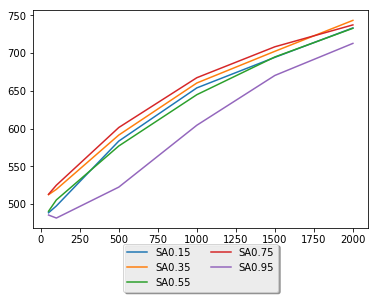

In [6]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

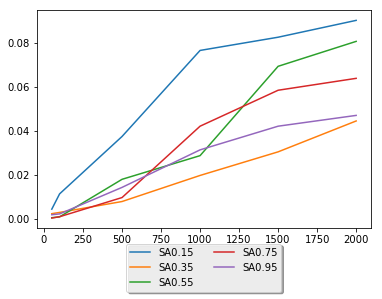

In [7]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [8]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 SA0.15
1 SA0.35
2 SA0.55
3 SA0.75
4 SA0.95


In [9]:
#Change this
df = df_concats[0]
df

,iterations,fitness,time,fevals
5,50,488.5,0.004472,61
10,100,497.5,0.011407,111
50,500,583.5,0.037459,511
100,1000,654.0,0.076523,1011
150,1500,694.5,0.082525,1511
200,2000,733.5,0.090171,2011


In [10]:
with open('../FLIPFLOP/ff_results.csv', 'a') as f:
    f.write('#Simulated Annealing\n')
df.to_csv('../FLIPFLOP/ff_results.csv', sep=',', mode='a', header=True)